# Python Time Series Crash Course_Part 1: Fundamental, Windows & Visualization

## Full Day Workshop for user learn Data Science with Python
### 2017 Dec Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose


# Time Series Forecasting

Time series forecasting is an important area of machine learning that is often neglected. It is
important because there are so many prediction problems that involve a time component. These
problems are neglected because it is this time component that makes time series problems more
dicult to handle. In this lesson, you will discover time series forecasting. After reading this
lesson, you will know:
 Standard denitions of time series, time series analysis, and time series forecasting.
 The important components to consider in time series data.
 Examples of time series to make your understanding concrete.

# Define Time Series
A normal machine learning dataset is a collection of observations

observation #1

observation #2

observation #3

A time series dataset is dierent. Time series adds an explicit order dependence between
observations: 

$$ time dimension $$ 


This additional dimension is both a constraint and a structure
that provides a source of additional information.

Time #1, observation

Time #2, observation

Time #3, observation

Before we move on, it is important to quickly establish the standard terms used when describing
time series data. The current time is dened as t, an observation at the current time is dened
as obs(t).
We are often interested in the observations made at prior times, called lag times or lags.
Times in the past are negative relative to the current time.

- t-n: A prior or lag time (e.g. t-1 for the previous time).
- t: A current time and point of reference.
- t+n: A future or forecast time (e.g. t+1 for the next time).

# Components of Time Series

Time series analysis provides a body of techniques to better understand a dataset. Perhaps the
most useful of these is the decomposition of a time series into 4 constituent parts:
1. **Level **. The baseline value for the series if it were a straight line.
2. **Trend**. The optional and often linear increasing or decreasing behavior of the series overtime.
3. **Seasonality**. The optional repeating patterns or cycles of behavior over time.
4. **Noise**. The optional variability in the observations that cannot be explained by the model.

All time series have a level, most have noise, and the trend and seasonality are optional.

## Concerns of Forecasting
When forecasting, it is important to understand your goal. Use the Socratic method and ask lots
of questions to help zoom in on the specics of your predictive modeling problem. For example:

#### 1. How much data do you have available and are you able to gather it all together?

More data is often more helpful, oering greater opportunity for exploratory data analysis,
model testing and tuning, and model delity.

#### 2. What is the time horizon of predictions that is required? Short, medium or long term? 

Shorter time horizons are often easier to predict with higher condence.

#### 3. Can forecasts be updated frequently over time or must they be made once and remain static? 

Updating forecasts as new information becomes available often
results in more accurate predictions.

#### 4. At what temporal frequency are forecasts required? 

Often forecasts can be made at a lower or higher frequencies, allowing you to harness down-sampling, and up-sampling
of data, which in turn can oer benets while modeling.

## Cleansing of Time Series
Time series data often requires cleaning, scaling, and even transformation. For example:

#### Frequency. 
Perhaps data is provided at a frequency that is too high to model or is
unevenly spaced through time requiring resampling for use in some models.
 
#### Outliers. 
Perhaps there are corrupt or extreme outlier values that need to be identied
and handled.
 
#### Missing.
Perhaps there are gaps or missing data that need to be interpolated or imputed.

### Machine Learning?
Time series data can be phrased as supervised learning. Given a sequence of numbers for a time
series dataset, we can restructure the data to look like a supervised learning problem. We can
do this by using previous time steps as input variables and use the next time step as the output
variable. Let's make this concrete with an example. Imagine we have a time series as follows:

In [ ]:
time 1, value 1
time 2, value 2
time 3, value 3

=> Into a format like this

input 1, output 1
input 2, output 2
input 3, output 3

We can restructure this time series dataset as a supervised learning problem by using the
value at the previous time step to predict the value at the next time-step. Re-organizing the
time series dataset this way, the data would look as follows:

In [71]:
X, y
?, 100
100, 110
110, 108
108, 115
115, 120
120, ?

SyntaxError: invalid syntax (<ipython-input-71-8c3e93de53c2>, line 7)

Take a look at the above transformed dataset and compare it to the original time series.
Here are some observations:
 We can see that the previous time step is the $$input(X)$$ 

and the next time step is the
$$output(y)$$ 

in our supervised learning problem.
 We can see that the order between the observations is preserved, and must continue to be
preserved when using this dataset to train a supervised model.
 We can see that we have no previous value that we can use to predict the rst value in
the sequence. We will delete this row as we cannot use it.

## Variate?
The number of observations recorded for a given time in a time series dataset matters. Tradi-
tionally, dierent names are used:

### Univariate Time Series:
These are datasets where only a single variable is observed
at each time, such as temperature each hour. The example in the previous section is a
univariate time series dataset.

### Multivariate Time Series:
These are datasets where two or more variables are observed
at each time.

The sweet spot for using machine learning for time series is where classical methods fall
down. This may be with complex univariate time series, and is more likely with multivariate
time series given the additional complexity.

## Sliding Window With Multiple Steps
The number of time steps ahead to be forecasted is important. Again, it is traditional to use
dierent names for the problem depending on the number of time-steps to forecast:

### One-Step Forecast: 
This is where the next time step $$(t+1)$$ is predicted.

### Multi-Step Forecast: 
This is where two or more future time steps are to be predicted.

All of the examples we have looked at so far have been one-step forecasts. There are a
number of ways to model multi-step forecasting as a supervised learning problem. For now,
we are focusing on framing multi-step forecast using the sliding window method. Consider the
same univariate time series dataset from the rst sliding window example above:

In [ ]:
time, measure
1, 100
2, 110
3, 108
4, 115
5, 120

We can frame this time series as a two-step forecasting dataset for supervised learning with
a window width of one, as follows:

In [ ]:
X1, y1, y2
? 100, 110
100, 110, 108
110, 108, 115
108, 115, 120
115, 120, ?
120, ?, ?

We can see that the first row and the last two rows cannot be used to train a supervised
model. It is also a good example to show the burden on the input variables. Specically, that
a supervised model only has X1 to work with in order to predict both y1 and y2. Careful
thought and experimentation are needed on your problem to nd a window width that results
in acceptable model performance.

# Data Preparation
## Load and Explore
The Pandas library in Python provides excellent, built-in support for time series data. Once
loaded, Pandas also provides tools to explore and better understand your dataset.

Pandas represented time series datasets as a Series. A 
$$Series$$ is a one-dimensional array with
a time label for each row.

In [5]:
# The code was removed by DSX for sharing.

In [13]:
from pandas import Series
from pandas import DataFrame
from pandas import concat

## Lag Features
Lag features are the classical way that time series forecasting problems are transformed into
supervised learning problems. The simplest approach is to predict the value at the next time
(t+1) given the value at the current time (t). The supervised learning problem with shifted
values looks as follow

In [2]:
del series['Date']

In [3]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
temps = DataFrame(series.values)
dataframe = concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t', 't+1']

In [4]:
dataframe.head()

,t,t+1
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8


In [90]:
dataframe = concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-2', 't-1', 't', 't+1']
print(dataframe.head(5))

    t-2   t-1     t   t+1
0   NaN   NaN   NaN  20.7
1   NaN   NaN  20.7  17.9
2   NaN  20.7  17.9  18.8
3  20.7  17.9  18.8  14.6
4  17.9  18.8  14.6  15.8


## Rolling Window Statistics
### why stop with a linear window?
A step beyond adding raw lagged values is to add a summary of the values at previous time
steps. We can calculate summary statistics across the values in the sliding window and include
these as features in our dataset. Perhaps the most useful is the mean of the previous few values,
also called the rolling mean.
We can calculate the mean of the current and previous values and use that to predict the
next value. For the temperature data, we would have to wait 3 time steps before we had 2
values to take the average of before we could use that value to predict a 3rd value. For example:

In [91]:
temps = DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, temps], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head(5))

   mean(t-1,t)   t+1
0          NaN  20.7
1          NaN  17.9
2        19.30  18.8
3        18.35  14.6
4        16.70  15.8


- The first NaN was created by the shift of the series.
- The second because NaN cannot be used to calculate a mean value.
- Finally, the third row shows the expected value of 19.30 (the mean of 20.7 and 17.9) used to predict the 3rd value in the series of 18.8. mean(t-1,t) t+1

#### There are more statistics we can calculate and even dierent mathematical ways of calculating the denition of the 

$$window$$

Below is another example that shows a window width of 3 and a
dataset comprised of more summary statistics, specically the minimum, mean, and maximum
value in the window.

In [93]:
temps = DataFrame(series.values)
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0   NaN        NaN   NaN  20.7
1   NaN        NaN   NaN  17.9
2   NaN        NaN   NaN  18.8
3   NaN        NaN   NaN  14.6
4  17.9  19.133333  20.7  15.8


Running the code prints the rst 5 rows of the new dataset. We can spot-check the correctness
of the values on the 5th row (array index 4). We can see that indeed 17.9 is the minimum and
20.7 is the maximum of values in the window of [20.7, 17.9, 18.8].

## Expanding Window Statistics
Another type of window that may be useful includes all previous data in the series. This is
called an expanding window and can help with ** keeping track of the bounds of observable data. **

Like the $$rolling()$$ function on DataFrame, Pandas provides an $$expanding()$$ function4 that
collects sets of all prior values for each time step.

In [94]:
temps = DataFrame(series.values)
window = temps.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8


the statistical calculations exclude the NaN values in the expanding window,
meaning no further modication is required. Below is an example of calculating the minimum,
mean, and maximum values of the expanding window on the daily temperature dataset.

# Data Visualization
Time series lends itself naturally to visualization. Line plots of observations over time are
popular, but there is a suite of other plots that you can use to learn more about your problem.

1. Line Plots.
2. Histograms and Density Plots.
3. Box and Whisker Plots.
4. Heat Maps.
5. Lag Plots or Scatter Plots.
6. Autocorrelation Plots.

The focus is on univariate time series, but the techniques are just as applicable to multivariate
time series, when you have more than one observation at each time step.

## Line Plot
The rst, and perhaps most popular, visualization for time series is the line plot. In this plot,
time is shown on the x-axis with observation values along the y-axis. Below is an example of
visualiz

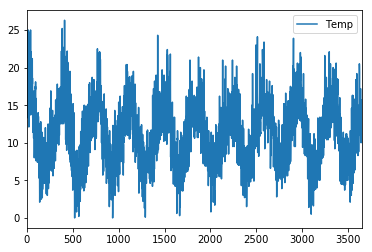

In [37]:
series.plot()
pyplot.show()

The line plot is quite dense. Sometimes it can help to change the style of the line plot; for
example, to use a dashed line or dots. Below is an example of changing the style of the line to
be black dots instead of a connected line (the style='k.' argument). We could change this
example to use a dashed line by setting style to be 'k--'.

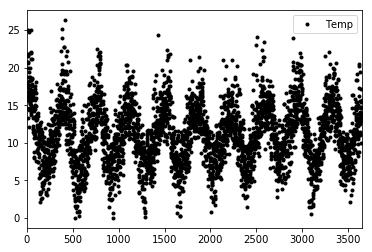

In [40]:
series.plot(style='k.')
pyplot.show()

/gpfs/fs01/user/sbb6-28ae32a56257b0-666d72869b6d/.local/lib/python2.7/site-packages/pandas/core/series.py:2849: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
/usr/local/src/bluemix_jupyter_bundle.v74/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


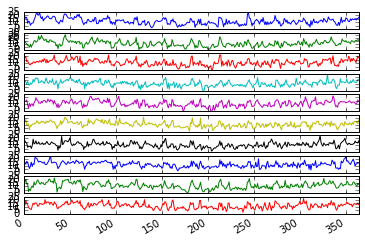

In [6]:

body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='daily-minimum-temperatures.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

series = Series.from_csv(body, header=0)
groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()


## Histogram and Density Plots
Another important visualization is of the distribution of observations themselves. This means a
plot of the values without the temporal ordering. Some linear time series forecasting methods
assume a well-behaved distribution of observations. But plots can provide
a useful rst check of the distribution of observations both on raw observations and after any
type of data transform has been performed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fe40e10>]], dtype=object)

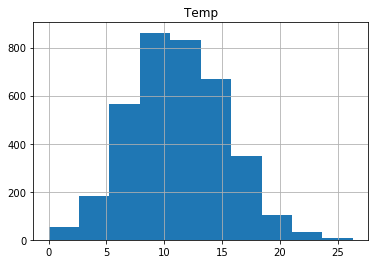

In [44]:
series.hist()

A histogram groups values into bins, and the frequency or count of
observations in each bin can provide insight into the underlying distribution of the observations.

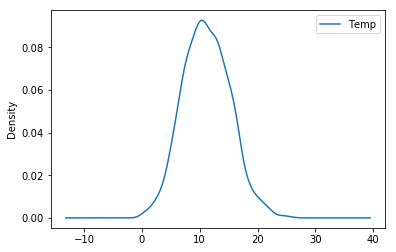

In [101]:
series.plot(kind='kde')
pyplot.show()

Running the example shows a distribution that looks strongly Gaussian. The plotting
function automatically selects the size of the bins based on the spread of values in the data. We can get a better idea of the shape of the distribution of observations by using a density
plot. 

## Box and Whisker Plots by Interval
Histograms and density plots provide insight into the distribution of all observations, but we
may be interested in the distribution of values by time interval. Another type of plot that is
useful to summarize the distribution of observations is the box and whisker plot. This plot
draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of
observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above
and below the box to summarize the general extents of the observations. Dots are drawn for
outliers outside the whiskers or extents of the data.

In [8]:
# create a boxplot of yearly data
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot


/usr/local/src/bluemix_jupyter_bundle.v74/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


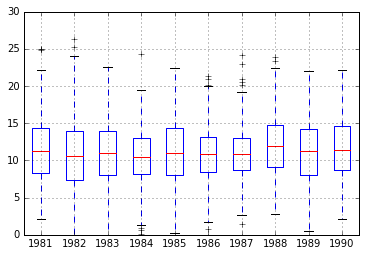

In [10]:

body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='daily-minimum-temperatures.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

series = Series.from_csv(body, header=0)
groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()


## Heat Maps
A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are
assigned a unique color. This is called a heatmap, as larger values can be drawn with warmer
colors (yellows and reds) and smaller values can be drawn with cooler colors (blues and greens).
Like the box and whisker plots, we can compare observations between intervals using a heat
map.  

In [8]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot


/usr/local/src/bluemix_jupyter_bundle.v74/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  if __name__ == '__main__':


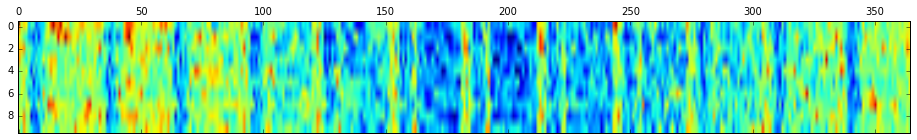

In [14]:
groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

As with the box and whisker plot example above, we can also compare the months within
a year. Below is an example of a heat map comparing the months of the year in 1990. Each
column represents one month, with rows representing the days of the month from 1 to 31.

/usr/local/src/bluemix_jupyter_bundle.v74/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  app.launch_new_instance()


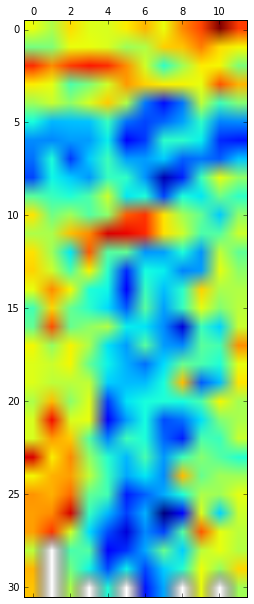

In [12]:
from pandas import concat
one_year = series['1990']
groups = one_year.groupby(TimeGrouper('M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

## Lag Scatter Plots
Time series modeling assumes a relationship between an observation and the previous observation.
Previous observations in a time series are called lags, with the observation at the previous time
step called lag1, the observation at two time steps ago lag=2, and so on. A useful type of plot
to explore the relationship between each observation and a lag of that observation is called the
scatter plot

/Applications/DataScienceStudio.app/Contents/Resources/kit/python.packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


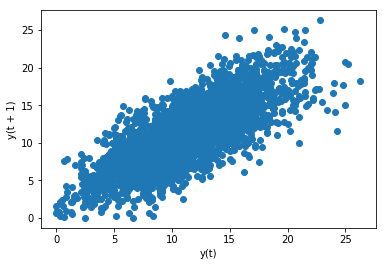

In [103]:
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
lag_plot(series)
pyplot.show()
#The plot created from running the example shows a relatively strong positive correlation between observations and their lag1 values.

More points tighter in to the diagonal line suggests a stronger relationship and more spread
from the line suggests a weaker relationship. A ball in the middle or a spread across the plot
suggests a weak or no relationship. observation at time t on the x-axis and the lag=1 observation (t-1) on the y-axis.
 If the points cluster along a diagonal line from the bottom-left to the top-right of the plot,
it suggests a positive correlation relationship.
 If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests
a negative correlation relationship.
 Either relationship is good as they can be modeled.

## 7 Days Lag Scatter Plot Check
We can repeat this process for an observation and any lag values. Perhaps with the
observation at the same time last week, last month, or last year, or any other domain-specic
knowledge we may wish to explore. For example, we can create a scatter plot for the observation
with each value in the previous seven days. 

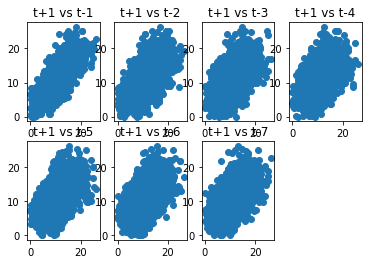

In [104]:
values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

Running the example suggests the strongest relationship between an observation with its
lag=1 value, but generally a good positive correlation with each value in the last week

## Autocorrelation Plots
We can quantify the strength and type of relationship between observations and their lags. In
statistics, this is called 

$$correlation$$, 

and when calculated against lag values in time series, it is
called $$autocorrelation$$ (self-correlation). 

A correlation value calculated between two groups of
numbers, such as observations and their lag=1 values, results in a number between -1 and 1.

Correlation values, called correlation coecients, can be calculated for each observation and
dierent lag values. Once calculated, a plot can be created to help better understand how this
relationship changes over the lag.

/Applications/DataScienceStudio.app/Contents/Resources/kit/python.packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


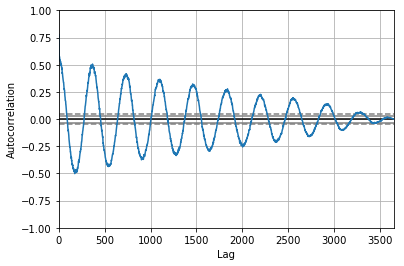

In [106]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

The resulting plot shows lag along the x-axis and the correlation on the y-axis. 

Dotted lines
are provided that indicate any correlation values above those lines are statistically signicant
(meaningful). We can see that for the Minimum Daily Temperatures dataset we see cycles of
strong negative and positive correlation. This captures the relationship of an observation with
past observations in the same and opposite seasons or times of year.

#### Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

# Resampling and Interpolation
You may have observations at the wrong 

$$ frequency $$.

Maybe they are too granular or not granular
enough. Pandas in Python to both increase
and decrease the sampling frequency of time series data.

### Resampling
Resampling involves changing the frequency of your time series observations. Two types of
resampling are:

#### Upsampling:
Where you increase the frequency of the samples, such as from minutes to seconds.

#### Downsampling: 
Where you decrease the frequency of the samples, such as from days to months.

In both cases, data must be invented. In the case of upsampling, care may be needed in
determining how the ne-grained observations are calculated using interpolation. In the case of
downsampling, care may be needed in selecting the summary statistics used to calculate the
new aggregated values.

#### Problem Framing: 
Resampling may be required if your data is available at the same
frequency that you want to make predictions.

#### Feature Engineering: 
Resampling can also be used to provide additional structure or
insight into the learning problem for supervised learning models.

There is a lot of overlap between these two cases. For example, you may have daily data
and want to predict a monthly problem. You could use the daily data directly or you could
downsample it to monthly data and develop your model. A

Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
1901-01-06    246.629032
1901-01-07    242.754839
1901-01-08    238.880645
1901-01-09    235.006452
1901-01-10    231.132258
1901-01-11    227.258065
1901-01-12    223.383871
1901-01-13    219.509677
1901-01-14    215.635484
1901-01-15    211.761290
1901-01-16    207.887097
1901-01-17    204.012903
1901-01-18    200.138710
1901-01-19    196.264516
1901-01-20    192.390323
1901-01-21    188.516129
1901-01-22    184.641935
1901-01-23    180.767742
1901-01-24    176.893548
1901-01-25    173.019355
1901-01-26    169.145161
1901-01-27    165.270968
1901-01-28    161.396774
1901-01-29    157.522581
1901-01-30    153.648387
1901-01-31    149.774194
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64


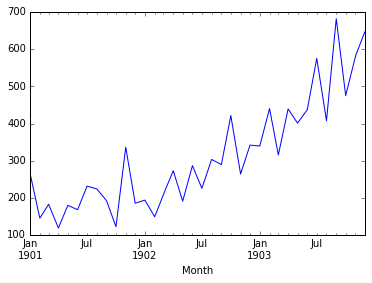

In [17]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='shampoo-sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

series = read_csv(body, header=0, parse_dates=[0], index_col=0,
squeeze=True, date_parser=parser)
upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()


In [ ]:
Month
1901-01-01 266.0
1901-01-02 NaN
1901-01-03 NaN
1901-01-04 NaN
1901-01-05 NaN
1901-01-06 NaN
1901-01-07 NaN
1901-01-08 NaN
1901-01-09 NaN
1901-01-10 NaN
1901-01-11 NaN
1901-01-12 NaN
1901-01-13 NaN
1901-01-14 NaN
1901-01-15 NaN
1901-01-16 NaN
1901-01-17 NaN
1901-01-18 NaN
1901-01-19 NaN
1901-01-20 NaN
1901-01-21 NaN
1901-01-22 NaN
1901-01-23 NaN
1901-01-24 NaN
1901-01-25 NaN
1901-01-26 NaN
1901-01-27 NaN
1901-01-28 NaN
1901-01-29 NaN
1901-01-30 NaN
1901-01-31 NaN
1901-02-01 145.9
Freq: D, Name: Sales, dtype: float64
Listing 7.2: Example output of u

We can see that the resample() function has created the rows by putting NaN values in the
new values. We can see we still have the sales volume on the rst of January and February from
the original data. Next, we can interpolate the missing values at this new frequency. The Series
Pandas object provides an interpolate() function to interpolate missing values, and there is
a nice selection of simple and more complex interpolation functions. A good starting point is to use a


$$ linear interpolation $$

. This draws a straight line between available data, in this case on the rst
of the month, and lls in values at the chosen frequency from this line.

In [ ]:
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0,
squeeze=True, date_parser=parser)
upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

In [ ]:
Month
1901-01-01 266.000000
1901-01-02 262.125806
1901-01-03 258.251613
1901-01-04 254.377419
1901-01-05 250.503226
1901-01-06 246.629032
1901-01-07 242.754839
1901-01-08 238.880645
1901-01-09 235.006452

Looking at a line plot, we see no dierence from plotting the original data (see Appendix)
as the plot already interpolated the values between points to draw the line.

Another common interpolation method is to use a 

$$polynomial$$

or a $$spline$$

to connect the
values. This creates more curves and can look more natural on many datasets. Using a spline
interpolation requires you specify the order (number of terms in the polynomial); in this case,
an order of 2 is just ne.

Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
1901-01-06    231.727880
1901-01-07    225.575149
1901-01-08    219.651553
1901-01-09    213.957094
1901-01-10    208.491770
1901-01-11    203.255582
1901-01-12    198.248529
1901-01-13    193.470612
1901-01-14    188.921831
1901-01-15    184.602185
1901-01-16    180.511676
1901-01-17    176.650301
1901-01-18    173.018063
1901-01-19    169.614960
1901-01-20    166.440993
1901-01-21    163.496161
1901-01-22    160.780465
1901-01-23    158.293905
1901-01-24    156.036481
1901-01-25    154.008192
1901-01-26    152.209039
1901-01-27    150.639021
1901-01-28    149.298139
1901-01-29    148.186393
1901-01-30    147.303783
1901-01-31    146.650308
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64


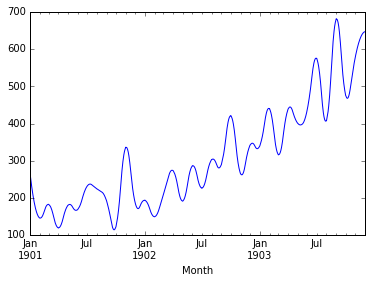

In [18]:
upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='spline', order=2)
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

## Downsampling Data
The sales data is monthly, but perhaps we would prefer the data to be quarterly. The year can
be divided into 4 business quarters, 3 months a piece. Instead of creating new rows between
existing observations, the resample() function in Pandas will group all observations by the
new frequency.

We could use an alias like 3M to create groups of 3 months, but this might have trouble if our
observations did not start in January, April, July, or October. Pandas does have a quarter-aware
alias of Q that we can use for this purpose. We must now decide how to create a new quarterly
value from each group of 3 records. 

A good starting point is to calculate the average monthly
sales numbers for the quarter. For this, we can use the 

$$$mean()$$


Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
Freq: Q-DEC, Name: Sales, dtype: float64


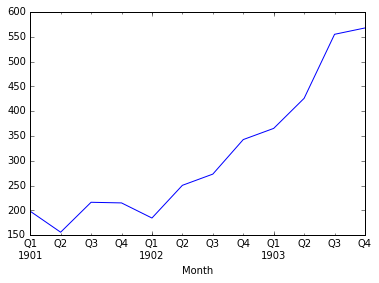

In [19]:
resample = series.resample('Q')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.show()

In [ ]:
Month
1901-03-31 198.333333
1901-06-30 156.033333
1901-09-30 216.366667
1901-12-31 215.100000
1902-03-31 184.633333
Freq: Q-DEC, Name: Sales, dtype: float64

Perhaps we want to go further and turn the monthly data into yearly data, and perhaps
later use that to model the following year.

Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Freq: A-DEC, Name: Sales, dtype: float64


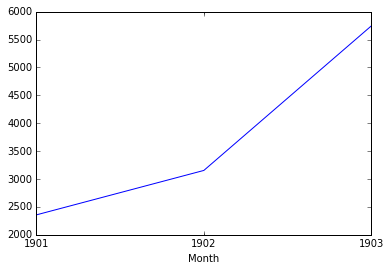

In [22]:
# downsample to yearly intervals
resample = series.resample('A')
yearly_mean_sales = resample.sum()
print(yearly_mean_sales.head())
yearly_mean_sales.plot()
pyplot.show()

In this tutorial, you discovered how to resample your time series data using Pandas in Python.
Specically, you learned:
 About time series resampling and the dierence and reasons between downsampling and
upsampling observation frequencies.
 How to upsample time series data using Pandas and how to use dierent interpolation
schemes.
 How to downsample time series data using Pandas and how to summarize grouped data.